# **Van der pol Oscillator**
(c) 2023 Devakumar Thammisetty

MPOPT is an open-source Multi-phase Optimal Control Problem (OCP) solver based on pseudo-spectral collocation with customized adaptive grid refinement techniques.

https://mpopt.readthedocs.io/

Download this notebook: [vanderpol.ipynb](https://github.com/mpopt/mpopt/blob/docs/docs/source/notebooks/vanderpol.ipynb)

Install mpopt from pypi using the following. Disable after first usage

Import mpopt (Contains main solver modules)

In [1]:
#!pip install mpopt
from mpopt import mp

OCP definition
---------------

Van der Pol OCP:
https://web.casadi.org/docs/#a-simple-test-problem

   \begin{aligned}
&\min_{x, u}        & \qquad & J = 0 + \int_{t_0}^{t_f}\left(x_0^2+x_1^2+u^2\right)dt\\
&\text{subject to} &      & \dot{x_0} = (1-x_1^2)\times x_0 - x_1 + u\\
&                  &      & \dot{x_1} = x_0 \\
&                  &      & x_1 \geq -0.25 \\
&                  &      & -1 \leq u \leq 1 \\
&                  &      & x_0(t_0) = 0; \ x_1(t_0) = 1; \\
&                  &      & t_0 = 0.0; \ t_f = 10
  \end{aligned}


We first create an OCP object and then polulate the object with dynamics, path_constraints, terminal_constraints and objective (running_costs, terminal_costs)

In [2]:
ocp = mp.OCP(n_states=2, n_controls=1)

In [3]:
def dynamics(x, u, t):
    return [(1 - x[1] * x[1]) * x[0] - x[1] + u[0], x[0]]

In [4]:
def running_cost(x, u, t):
    return x[0] * x[0] + x[1] * x[1] + u[0] * u[0]

In [5]:
ocp.dynamics[0] = dynamics
ocp.running_costs[0] = running_cost

Initial state

In [6]:
ocp.x00[0] = [0, 1]

Box constraints

In [7]:
ocp.lbu[0] = -1.0
ocp.ubu[0] = 1.0
ocp.lbx[0][1] = -0.25
ocp.lbtf[0] = 10.0
ocp.ubtf[0] = 10.0

In [8]:
ocp.validate()

Solve and plot the results in one line
----------------------------------------

Lets solve the OCP using following pseudo-spectral approximation
* Collocation using Legendre-Gauss-Radau roots
* Let's plot the position and velocity evolution with time starting from 0.



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:       76
                     variables with only lower bounds:       25
                variables with lower and upper bounds:       26
                     variables with only upper bounds:        0
Total number of equality constraints.................:       52
Total number of inequality constraints...............:       25
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       25
        inequality constraints with only upper bounds:        0


Number of Iterations....: 11

    

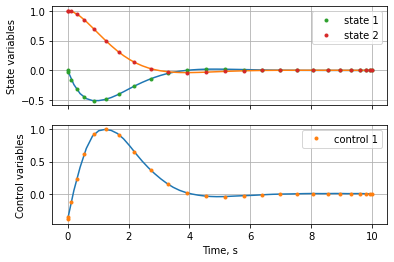

In [9]:
mpo, post = mp.solve(ocp, n_segments=1, poly_orders=25, scheme="LGR", plot=True)

*Retrive the solution*

x: states, u: Controls, t:time, a:Algebraic variables

In [10]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 10 (Exact), {x[-1]}")

Terminal time, state : 10.0000 vs 10 (Exact), [-0.00178384 -0.00014044]


Solve again with Chebyshev-Gauss-Lobatto (CGL) roots
------------------------------------------------------

Total number of variables............................:       76
                     variables with only lower bounds:       25
                variables with lower and upper bounds:       26
                     variables with only upper bounds:        0
Total number of equality constraints.................:       52
Total number of inequality constraints...............:       25
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       25
        inequality constraints with only upper bounds:        0


Number of Iterations....: 12

                                   (scaled)                 (unscaled)
Objective...............:   2.8734060736207896e+00    2.8734060736207896e+00
Dual infeasibility......:   2.6383995374325467e-12    2.6383995374325467e-12
Constraint violation....:   2.1178614417749486e-12    2.1178614417749486e-12
Complementarity.........:   2.5713635670826573e-09    2.5713635670826573e-09
Overall NLP e

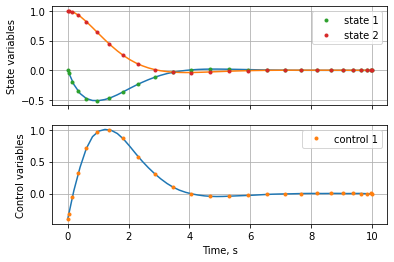

In [11]:
mpo, post = mp.solve(ocp, n_segments=1, poly_orders=25, scheme="CGL", plot=True)

In [12]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 10s (Exact), {x[-1]}")

Terminal time, state : 10.0000 vs 10s (Exact), [-0.00178269 -0.00013973]


### Solve again with Legendre-Gauss-Lobatto (LGL) roots

Total number of variables............................:       76
                     variables with only lower bounds:       25
                variables with lower and upper bounds:       26
                     variables with only upper bounds:        0
Total number of equality constraints.................:       52
Total number of inequality constraints...............:       25
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:       25
        inequality constraints with only upper bounds:        0


Number of Iterations....: 11

                                   (scaled)                 (unscaled)
Objective...............:   2.8734849959084205e+00    2.8734849959084205e+00
Dual infeasibility......:   8.2869030765986375e-12    8.2869030765986375e-12
Constraint violation....:   6.0937921375625592e-12    6.0937921375625592e-12
Complementarity.........:   2.6832881949699023e-09    2.6832881949699023e-09
Overall NLP e

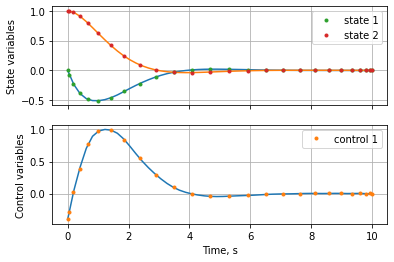

In [13]:
mpo, post = mp.solve(ocp, n_segments=1, poly_orders=25, scheme="LGL", plot=True)

In [14]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 10s (Exact), {x[-1]}")

Terminal time, state : 10.0000 vs 10s (Exact), [-0.00178275 -0.00014031]
